In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

import sys
sys.path.append("../../scripts")
import importlib

import model
importlib.reload(model)
from model import Model, model_from_file

import model_plot
importlib.reload(model_plot)
from model_plot import model_plot

import free_energy
importlib.reload(free_energy)
from free_energy import FreeEnergy

%matplotlib inline

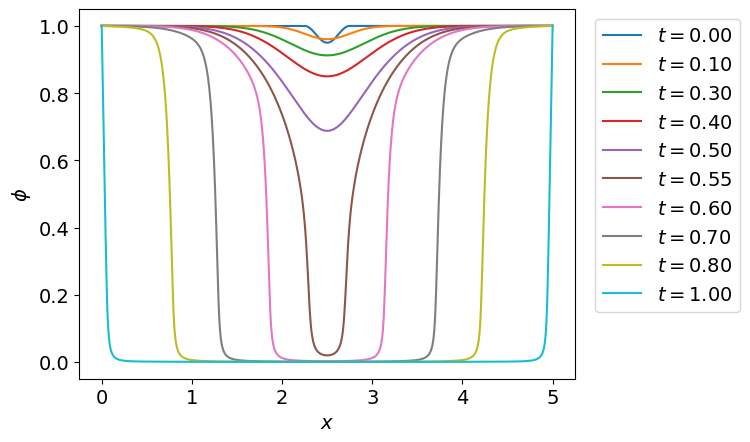

In [2]:
model = model_from_file('../../bin/experiment.csv')
model_plot(model, [0, 0.1, 0.3, 0.4, 0.5, 0.55, 0.6, 0.7, 0.8, 1], False)

In [3]:
energy = FreeEnergy(model)
times = [0, 0.1, 0.3, 0.4, 0.5, 0.55, 0.6, 0.7, 0.8, 1]

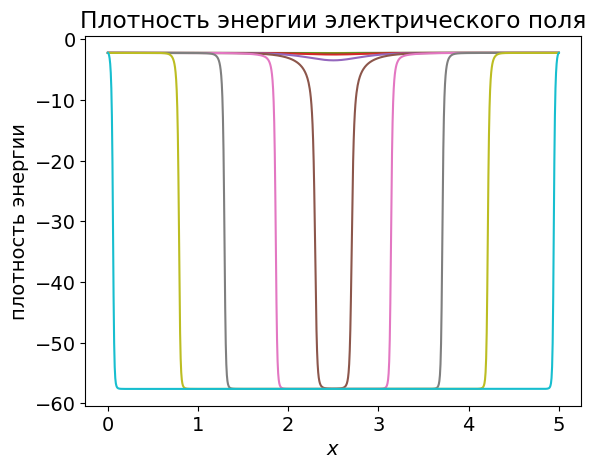

In [11]:
plt.title('Плотность энергии электрического поля')
plt.xlabel('$x$')
plt.ylabel('плотность энергии')
for t in times:
    plt.plot(model.xs, energy.density_electrical(t))
plt.show()

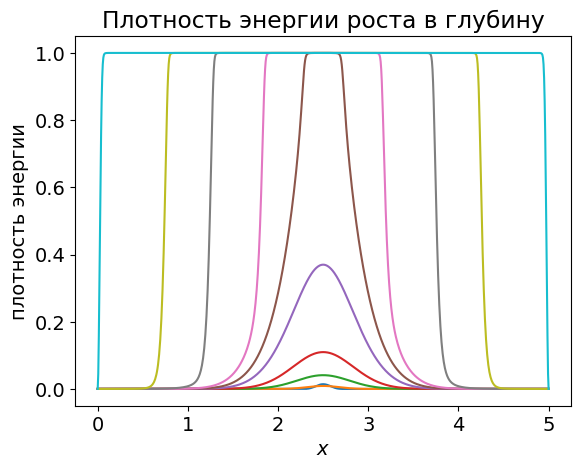

In [12]:
plt.title('Плотность энергии роста в глубину')
plt.xlabel('$x$')
plt.ylabel('плотность энергии')
for t in times:
    plt.plot(model.xs, energy.density_depth(t))
plt.show()

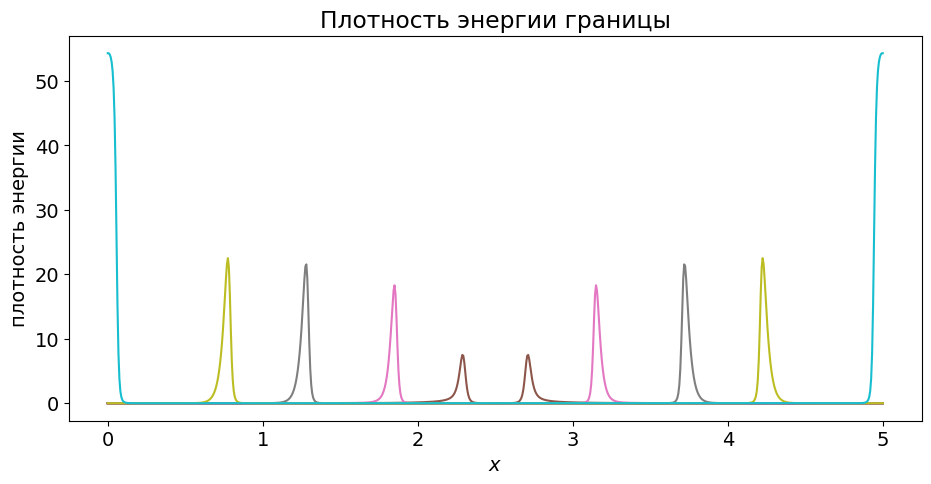

In [13]:
plt.figure(figsize=(11, 5))
plt.title('Плотность энергии границы')
plt.xlabel('$x$')
plt.ylabel('плотность энергии')
for t in times:
    plt.plot(model.xs, energy.density_surface(t))
plt.show()

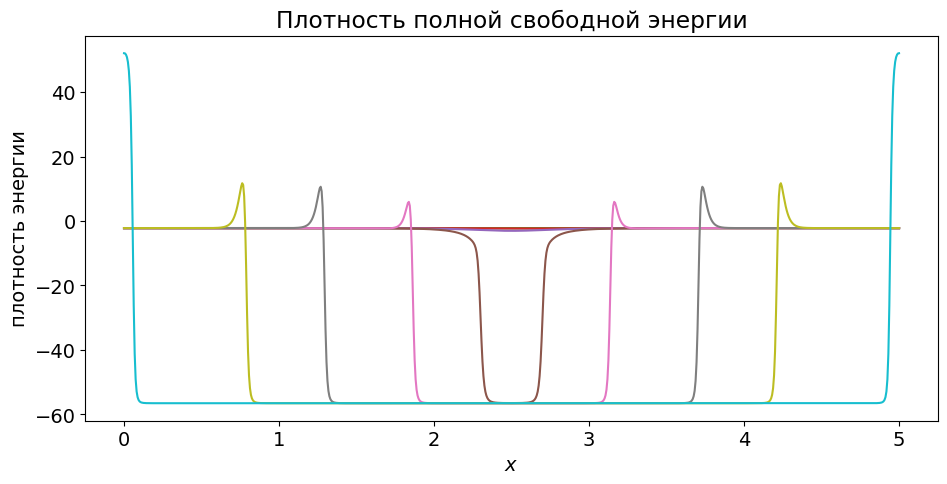

In [14]:
plt.figure(figsize=(11, 5))
plt.title('Плотность полной свободной энергии')
plt.xlabel('$x$')
plt.ylabel('плотность энергии')
for t in times:
    plt.plot(model.xs, energy.density_total(t))
plt.show()

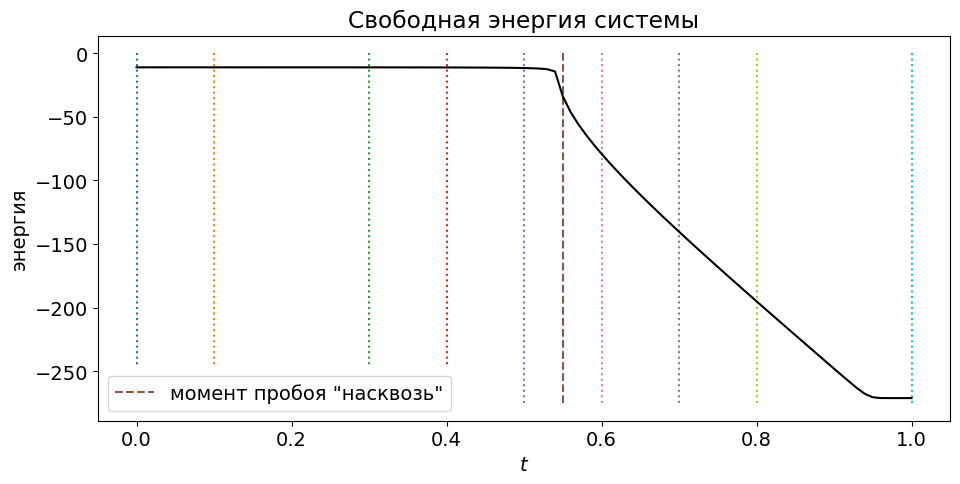

In [34]:
plt.figure(figsize=(11, 5))
plt.title('Свободная энергия системы')
plt.xlabel('$t$')
plt.ylabel('энергия')
t = np.linspace(0, 1, 101)
for i in times:
    if i == 0.55:
        plt.plot([i, i], [0, -275], '--')
    else:
        plt.plot([i, i], [0, -275 if i > 0.45 else -245], ':', label='_nolegend_')
plt.plot(t, [energy.energy_total(i) for i in t], color='black')
plt.legend(['момент пробоя "насквозь"'])
plt.show()

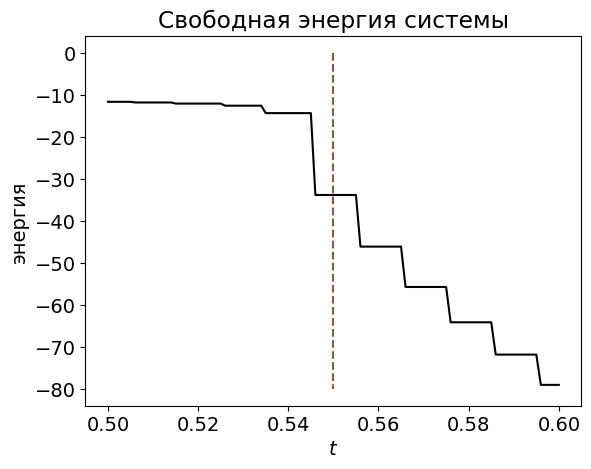

In [115]:
plt.title('Свободная энергия системы')
plt.xlabel('$t$')
plt.ylabel('энергия')
t = np.linspace(0.5, 0.6, 101)
plt.plot([0.55, 0.55], [0, -80], '--', color='C5')
plt.plot(t, [energy.energy_total(i) for i in t], color='black')
plt.show()